In [1]:
# - load useful libraries
import xarray as xr
import numpy as np
import powerspec as ps
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 60

/Users/adekunle/anaconda/envs/python36/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Autosaving every 60 seconds


## 1 - Get velocity data

In [2]:
# - get data
ds_path = '../data/eNATL60SBOX-BLBT02_y2010m03d01.1h_vozocrtx_lev0.nc'
ds = xr.open_dataset(ds_path)
ds

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, depthu: 1, time_counter: 24, x: 298, y: 398)
Coordinates:
  * depthu               (depthu) float32 0.48045477
    nav_lat              (y, x) float32 ...
    nav_lon              (y, x) float32 ...
    time_centered        (time_counter) datetime64[ns] ...
  * time_counter         (time_counter) datetime64[ns] 2010-03-01T00:30:00 ...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds        (depthu, axis_nbounds) float32 ...
    time_counter_bounds  (time_counter, axis_nbounds) float64 ...
    vozocrtx             (time_counter, depthu, y, x) float32 ...
Attributes:
    name:         /scratch/tmp/5330499/eNATL60-BLBT02X_1h_20100220_20100316_g...
    description:  ocean U grid variables
    title:        ocean U grid variables
    Conventions:  CF-1.6
    timeStamp:    2019-Apr-03 05:55:55 GMT
    uuid:         0bff26d2-426e-492d-81f5-d8c6cfcefc60
    ibegin:       0
    ni:           8354
   

In [3]:
u = ds.vozocrtx
u.shape

(24, 1, 398, 298)

In [4]:
u = u.squeeze()
u.shape

(24, 398, 298)

## 2 - Plot U

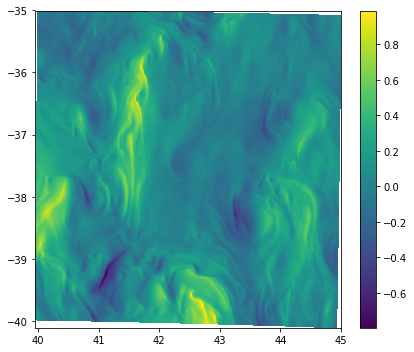

In [5]:
plt.figure(figsize=(6,5))
plt.pcolormesh(u.nav_lat,u.nav_lon,u[0])
plt.colorbar()
plt.tight_layout()

## 3 - Compute Spectral density

In [6]:
ps.wavenumber_spectra?

Signature: ps.wavenumber_spectra(data, navlon, navlat, window='Tukey', detrend='Both')
Docstring:
This function computes wavenumber spectral density of a two dimensional dataset.

Input
    data : Two dimensional dataset Eg SSH
    navlon : Longitude
    navlat : Latitude
    window : None , 'Hanning' or 'Tukey' : (tappered consine window with /apha = 0.5).
    detrend :
        "both" : detrend the 2D data along both axes.
        "zonal" : detrend the data in the zonal direction only
        "RemoveMean" : Remove only the mean of the data
        "RmeanDtrend" : Remove the mean then detrend the data in both direction
        None : use the raw data
Return
    wavenumber : Horizontal wavenumber
    psd : isotropic power spectral density
File:      ~/anaconda/envs/python36/lib/python3.6/site-packages/powerspec/powerspec.py
Type:      function


In [7]:
# - compute hourly spectral then estimate the mean
_psd = [] 
for k in range(len(u)):
    wavenumber,psd_ = ps.wavenumber_spectra(u[k].to_masked_array(),u.nav_lon,u.nav_lat)
    _psd.append(psd_) 
psd = np.array(_psd).mean(axis=0)

## 4 - Plot monthly mean of psd

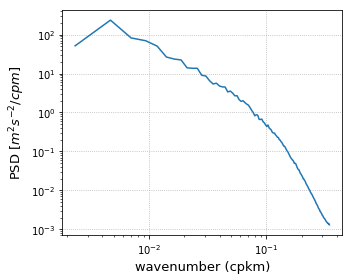

In [9]:
# - Plot spectral density
plt.figure(figsize=(5,4))
plt.loglog(wavenumber*1E3,psd)
plt.xlabel('wavenumber (cpkm)',fontsize=13)
plt.ylabel('PSD '+r'[$m^{2}s^{-2}/cpm$]',fontsize=13)
plt.grid(ls='dotted')
plt.tight_layout()